## About State of Data Science and Machine Learning Survey 2019 

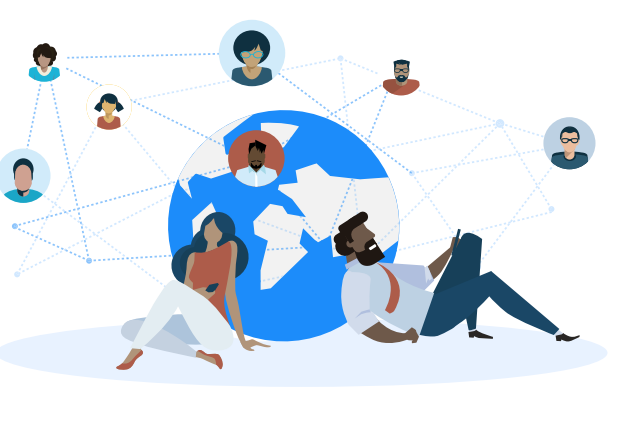

Kaggle’s third annual survey of its community shows the worldwide reach of data science. Based on responses from **19,717 Kaggle members**, this report focuses on the **21% that are currently employed as data scientists**.Overall, we see a relatively young, highly educated community working at companies of all sizes that are still figuring out the best way to adopt machine learning technologies. 

**About the Competition:**

Tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about


## **Objective/Story of the kernel:**

To prove the fact that ** Your dream doesn't have to be big it just have to be your's...!** by showing how young minds are uprising by following their dreams in the field of data science and to state that age is just a number and also to show the young minds what skills they lack when compared to data scientist

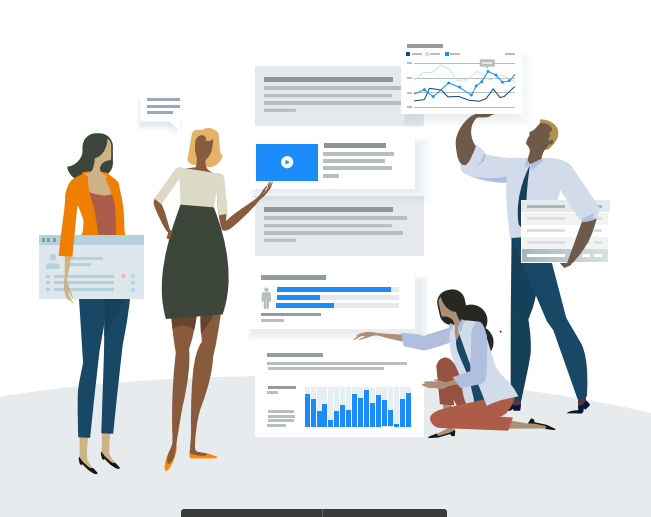

Data Science is a composite of a number of pre-existing disciplines. It is a young profession and academic discipline. The term was first coined in **2001**. Its popularity has exploded since 2010, pushed by the need for teams of people to analyze the big data that corporations and governments are collecting. In 2012, when Harvard Business Review called it **The Sexiest Job of the 21st Century** the term "data science" became a buzzword.

Most of us know the above story. Now you might be thinking why I have metioned the origin of Data Science and the quote **Your Dream doesn't have to be big, It just have to be yours**. Now, while you keep on thinking i'll explain you why I did so...

**Uprising**...,Yes young minds are. As mentioned earlier, not only data science is a very young profession and the people pursuing the career is also. Many of us are below the age 25. Eventhough ,many have skills they don't have as many opportunities as they lack experience. Learning is a process, we won't sustain in that process unless we enjoy the it.

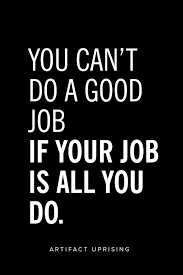

As mentioned the people who have the hunger to learn, will go for the hunt to improve their skills and I strongly believe **those are the people who have don't have a very big dream it is just their's**. So, In this kernel I will be exploring the skills and talents of such young minds and where they are behind/forward when compared to the experienced people. At the end, I'll try to prove that **age is just a number**

**Loading the necessary packages and reading the files**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
survey19_df=pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv", encoding='utf-8')
survey18_df=pd.read_csv("/kaggle/input/survey2018/mcq_2018.csv", encoding='utf-8')
survey17_df=pd.read_csv("/kaggle/input/survey2017/mcq_2017.csv", encoding="ISO-8859-1")

**Simple Exploratory Analysis**

Let's try to find out the active participation of people across the last three year surveys

In [ ]:
Missing_data=pd.DataFrame()
data_year=[2017,2018,2019]
Average_missings=[np.mean(survey17_df.isnull().sum().values),
                np.mean(survey18_df.isnull().sum().values),
                np.mean(survey19_df.isnull().sum().values)]
Total_questions=[len(survey17_df.isnull().sum().values),
                 len(survey18_df.isnull().sum().values),
                 len(survey19_df.isnull().sum().values)]
Missing_data['Year']=data_year
Missing_data['Total_questions']=Total_questions
Missing_data['Average_missings']=Average_missings

## Unaswered Questions Vs Total Survey Questions

**Average Unanswered questions over the year**

In [ ]:
#py.init_notebook_mode(connected=True)
fig = px.bar(Missing_data, x='Year', y='Average_missings',
             hover_data=['Average_missings'], color='Average_missings',
             labels={'pop':'Average Unanswered questions over the year'}, height=300,width=500)
fig.show()

**Number of questions over the year**

In [ ]:
py.init_notebook_mode(connected=True)
fig = px.bar(Missing_data, x='Year', y='Total_questions',
             hover_data=['Total_questions'], color='Total_questions',
             labels={'pop':'Number of questions over the year'}, height=300,width=500)
fig.show()

**Observations:**

No of questions unaswered is **directly proportional** to the number of questions asked.

**What are the questions about?**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

inv_names = []
for invs in survey19_df.iloc[0]:
    for inv in str(invs).split():
        if inv != "":
            inv_names.append(inv.strip().lower().replace("'",""))
            
def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'nan', ' nan',"what","is","the",
                      "how","when","why","use","select","selected","basis","apply","choice","none"}
    
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=600, 
                    height=300,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'blue',
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

plot_wordcloud(' '.join(inv_names), title="What are the survey questions about?")

## Young Minds participation over the years

In [ ]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['2017', '2018', '2019']
group_size=[len(survey17_df),len(survey18_df),len(survey19_df)]
subgroup_names=['Freshers', 'Experienced', 'Freshers','Experienced','Freshers','Experienced']
subgroup_size=[ len(survey17_df.loc[survey17_df['Age'] < 25]),
                len(survey17_df)-len(survey17_df.loc[survey17_df['Age'] < 25]),
                len(survey18_df.loc[survey18_df['Q2'].isin(['22-24','18-21'])]),
                len(survey18_df)-len(survey18_df.loc[survey18_df['Q2'].isin(['22-24','18-21'])]),
                len(survey19_df.loc[survey19_df['Q1'].isin(['22-24','18-21'])]),
                len(survey19_df)-len(survey19_df.loc[survey19_df['Q1'].isin(['22-24','18-21'])])]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.6), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

# show it
plt.title("Young Mind's Participation over the years",y=0.45)
plt.show()

In [ ]:
len(survey17_df.loc[survey17_df['Age'] < 25])/len(survey17_df)

In [ ]:
Intrest_rate=pd.DataFrame()
Intrest_rate['Year']=group_names=['2017', '2018', '2019']
Intrest_rate['InterestRate']=[ len(survey17_df.loc[survey17_df['Age'] < 25])/len(survey17_df),
                               len(survey18_df.loc[survey18_df['Q2'].isin(['22-24','18-21'])])/len(survey18_df),
                                 len(survey19_df.loc[survey19_df['Q1'].isin(['22-24','18-21'])])/len(survey19_df)]
fig = px.bar(Intrest_rate, x='Year', y='InterestRate',
             hover_data=['InterestRate'], color='InterestRate',
             labels={'pop':'Interest over the year'}, height=300,width=500)
fig.show()

**Observation:**

From this plot, we are able to observe that in each year more than **25%** of the respondants are **less than 25 years old** and our main focus will be on this group of people.


**Where does this young minds come from?**

In [ ]:
Country=pd.DataFrame()
Country['Name']=survey19_df.Q3.value_counts().index
Country['Values']=survey19_df.Q3.value_counts().values

fig = px.choropleth(Country, locations='Name',
                    locationmode='country names',
                    color="Values")
fig.update_layout(title="Data Science Enthusiast From each country")
fig.show()

## **Observation**

Most of the survey participants belong to **India** and **USA**. Let's find the young minds ratio to this...! 

In [ ]:
temp_df=survey19_df[['Q1','Q3']]
temp_df['Q1'] = temp_df['Q1'].map({'22-24': 1, '18-21': 1})

India_ymind=(temp_df.loc[temp_df['Q3']=='India'].Q1.value_counts())/len(temp_df.loc[temp_df['Q3']=='India'])
USA_ymind=(len(temp_df.loc[temp_df['Q3']=='United States of America'].Q1.value_counts()))/(len(temp_df.loc[temp_df['Q3']=='United States of America']))

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Young Minds", "Experienced People" ]
#py.init_notebook_mode(connected=True)
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['India', 'U.S.A'])
fig.add_trace(go.Pie(labels=labels, values=[0.557041, 1-0.557041], scalegroup='one',
                     name="USA's young mind ratio"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[0.15623987034035655,0.8437601296596434], scalegroup='one',
                     name="USA's young mind ratio"), 1, 2)

fig.update_layout(title_text='Young Minds Ratio')
fig.show()

Intresting right seeing the young minds ratio difference between these two top contributor's to the survey

**Let's figure out the gender variation across fresher's and experienced people**

In [ ]:
group_1=survey19_df[["Q1","Q2"]].loc[survey19_df["Q1"].isin(['18-21','22-24'])]
group_2=survey19_df[["Q1","Q2"]].loc[survey19_df["Q1"].isin(['40-44','55-59','50-54','30-34', '25-29', '35-39', '45-49', '60-69', '70+'])]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#py.init_notebook_mode(connected=True)
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Fresher's", "Experienced people"])
fig.add_trace(go.Pie(labels=list(group_1["Q2"].value_counts().index), values=list(group_1["Q2"].value_counts().values), scalegroup='one',
                     name="Gender variation across fresher's"), 1, 1)
fig.add_trace(go.Pie(labels=list(group_2["Q2"].value_counts().index), values=list(group_2["Q2"].value_counts().values), scalegroup='one',
                     name="Gender variation across experienced people"), 1, 2)

fig.update_layout(title_text="Gender variation across freshers and experienced people")
fig.show()

**Observations:**

We can see clearly that men are dominating both the categories, However we can see that women's ratio is increased by **2%** which is really a good sign.

## Educational background Young Minds Vs Data Scientist

**What is the educational background of the data scientist?**

In [ ]:
temp=survey19_df.loc[survey19_df["Q5"].isin(["Data Scientist","Student"])]
temp=temp.iloc[1:]

In [ ]:
import seaborn as sns
education = (temp.groupby(['Q5'])['Q4']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
education.Q4.replace(to_replace={"Some college/university study without earning a bachelor’s degree":"College without degree"}, 
                     inplace=True)
education.rename(columns={"Q4": "Highest education attained / planned"}, inplace=True)


plt.figure(figsize=(10,7))

p = sns.barplot(x="Highest education attained / planned", y="Ratio", hue="Q5", data=education[:10])
_ = plt.setp(p.get_xticklabels(), rotation=45)

**Observations:**

Young Minds are in the right track...they have quite similar educational background as compared to the data scientist... Let's find out what are the areas the young minds have to improve in order to become successful in their respective career.

**What is the age and gender group of the data scientist?**

In [ ]:
temp=survey19_df.loc[survey19_df["Q5"].isin(["Data Scientist"])]
temp=temp.iloc[1:]
import seaborn as sns
age = (temp.groupby(['Q1'])['Q2']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
age.Q2=age.Q2.map({"Prefer to self-describe":"Prefer not to say",
             "Prefer not to say":"Prefer not to say",
             "Female":"Female",
             "Male":"Male"})
age.rename(columns={"Q1": "Age Group"}, inplace=True)
plt.figure(figsize=(10,7))

p = sns.barplot(x="Age Group", y="Ratio", hue="Q2", data=age)
_ = plt.setp(p.get_xticklabels(), rotation=45)

**Observation:**

It's pretty obvious to see stats of how experienced people dominating the list, but it is suprising that few young minds stated themselves as data scientist and they can be an outlier or a noise but its very good see their determination/growth. 

**Kaggler's and their respective jobs**

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,7))

# Horizontal Bar Plot
title_cnt=survey19_df.Q5.iloc[1::].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='crimson')
plt.show()

## **Age Vs Money Vs Mooc's**

In [ ]:
Money_spend=survey19_df['Q11'].iloc[1::].value_counts()
temp= (survey19_df.iloc[1::].groupby(['Q11'])['Q1']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))
age=temp.loc[temp['Q11']=='$0 (USD)'].Q1
value=temp.loc[temp['Q11']=='$0 (USD)'].Ratio
trace0=go.Bar(x=Money_spend.index,
              y=Money_spend.values,
              name='',
             marker=dict(
             color='#03396c '),showlegend=False)
trace1=go.Scatter(x=age,
                 y=value,
                 name=' ',
                   marker=dict(
             color='#2c2f33'),showlegend=False)
colors = ['#1a472a', '#d62d20', '#5d5d5d','#8c564b','#008080','#800000','#808000'] 

Moocs={}
for i in range(12):
    value=survey19_df['Q12_Part_'+str(i+1)].value_counts().values[0]
    text=survey19_df['Q12_Part_'+str(i+1)].value_counts().index[0]
    Moocs[text]=value
labels=list(Moocs.keys())
values=list(Moocs.values())

trace2= go.Pie(labels=labels, values=values, marker=dict(colors=colors))
fig = tools.make_subplots(rows=2, cols=2, specs=[[{"type": "bar"},{"type": "pie", "rowspan": 2}],
           [ {"type": "scatter"},None]],
                          subplot_titles=('Money Spend on Learning','''Preferred Source of Mooc's''','Age group of people using open Sources'))

fig.append_trace(trace2, 1, 2)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig['layout'].update( height=700,width=1200,margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
py.offline.iplot(fig)

**Observations:**

* **kaggle** and **Blogs** seems to be the dominating source of MOOC's among the surveyor's.
* As the age increases the people spending money on education also increases.
* Most of the people prefer spending **very less** or ** almost no** amount on spending in MOOC's



**Kernel is under construction. Stay tuned for more updates**

**Any suggesstion please leave in the comment box**